In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Name           891 non-null object
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Survived       891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [6]:
df.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [7]:
df.drop("Cabin",axis=1,inplace=True)

In [8]:
df.dropna(inplace=True)

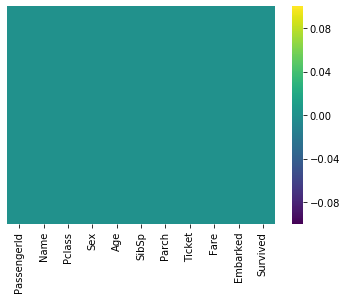

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [11]:
df.head(3)

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1


In [12]:
sex=pd.get_dummies(df["Sex"],drop_first=True)

In [13]:
emb=pd.get_dummies(df["Embarked"],drop_first=True)

In [14]:
cls=pd.get_dummies(df["Pclass"],drop_first=True)

In [15]:
df=pd.concat([df,sex,emb,cls],axis=1)

In [16]:
df.head(3)

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,male,Q,S,2,3
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,1,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C,1,0,0,0,0,0
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,1,0,1


In [19]:
df.head()

,Age,SibSp,Parch,Fare,Survived,male,Q,S,2,3
0,22.0,1,0,7.2500,0,1,0,1,0,1
1,38.0,1,0,71.2833,1,0,0,0,0,0
2,26.0,0,0,7.9250,1,0,0,1,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0
4,35.0,0,0,8.0500,0,1,0,1,0,1


In [25]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10)

In [27]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [28]:
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
model.score(X_test,y_test)

0.8084112149532711

In [30]:
prediction=model.predict(X_test)

In [31]:
prediction

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [36]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [37]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      0.90      0.85       124
           1       0.84      0.68      0.75        90

    accuracy                           0.81       214
   macro avg       0.81      0.79      0.80       214
weighted avg       0.81      0.81      0.80       214



In [39]:
cm=confusion_matrix(y_test,prediction)
cm

array([[112,  12],
       [ 29,  61]], dtype=int64)

In [42]:
model.score(X_train, y_train)

0.7771084337349398

In [43]:
model.score(X_test,y_test)

0.8084112149532711

# Naive_Bayes Using Bernoulli Therom

In [49]:
X1=df.drop("Survived",axis=1)
y1=df["Survived"]

In [50]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.30,random_state=10)

In [51]:
from sklearn.naive_bayes import BernoulliNB

In [52]:
be=BernoulliNB()

In [53]:
be.fit(X1_train,y1_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [54]:
y1_predict=be.predict(X1_test)

In [55]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [56]:
be.score(X1_train,y1_train)

0.7570281124497992

In [57]:
be.score(X1_test,y1_test)

0.7990654205607477